# Real Waste Model Fitting and Evaluation

In [42]:
# some necessary imports... may need to trim later
# actually this is a total, disgraceful mess - clean it up!  

import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from keras.utils import np_utils, plot_model, to_categorical
from keras.models import Sequential, Model
# I will need them all actually
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras import layers, Input
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

from IPython.display import display, Image
import PIL

import pickle


## Loading .pkl files from preprocessing notebook

In [2]:
fh = open('RealWaste_X_train_aug.pkl', 'rb')
X_train_aug=pickle.load(fh)
fh.close()

fh = open('RealWaste_X_test.pkl', 'rb')
X_test=pickle.load(fh)
fh.close()

fh = open('RealWaste_y_train_aug.pkl', 'rb')
y_train_aug=pickle.load(fh)
fh.close()

fh = open('RealWaste_y_test.pkl', 'rb')
y_test=pickle.load(fh)
fh.close()

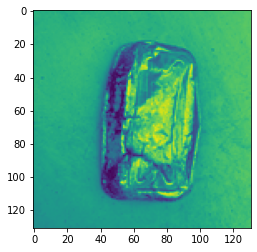

In [7]:
plt.imshow(X_train_aug[3135])

In [8]:
y_train_aug[3135]

3

## Classification using basic CNN's

In [31]:
# I'd like to plot accuracy against training epochs...

def plot_epochs(model_fit, model_id=""):
    acc = model_fit.history['accuracy']
    val_acc = model_fit.history['val_accuracy']
    epochs = list(range(1, (len(acc) + 1)))
    plt.plot(epochs, acc, label="training accuracy")
    plt.plot(epochs, val_acc, label="validation accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.xticks(epochs)
    plt.title("accuracy for CNN model " + model_id)
    plt.legend()
    plt.show()

In [19]:
X_train_aug = np.asarray(X_train_aug)
X_test = np.asarray(X_test)
y_train_aug = np.asarray(y_train_aug)
y_test = np.asarray(y_test)

In [20]:
# starting with a very basic convolutional model


CNN_model_1 = Sequential([
    Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(131,131,1)),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(9,activation='softmax')
])

CNN_model_1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 131, 131, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 65, 65, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 135200)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               17305728  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 9)                 1161      
                                                      

In [21]:
CNN_model_1.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'
)


CNN_model_1_fit = CNN_model_1.fit(X_train_aug, y_train_aug, validation_data=(X_test, y_test), batch_size=32, epochs=20)

Epoch 1/20
476/476 [==============================] - 118s 247ms/step - loss: 28.3058 - accuracy: 0.1864 - val_loss: 2.1619 - val_accuracy: 0.1840
Epoch 2/20
476/476 [==============================] - 105s 220ms/step - loss: 2.1469 - accuracy: 0.1963 - val_loss: 2.1527 - val_accuracy: 0.1840
Epoch 3/20
476/476 [==============================] - 107s 225ms/step - loss: 2.1402 - accuracy: 0.1963 - val_loss: 2.1521 - val_accuracy: 0.1840
Epoch 4/20
476/476 [==============================] - 107s 225ms/step - loss: 2.1391 - accuracy: 0.1963 - val_loss: 2.1527 - val_accuracy: 0.1840
Epoch 5/20
476/476 [==============================] - 106s 222ms/step - loss: 2.1389 - accuracy: 0.1963 - val_loss: 2.1530 - val_accuracy: 0.1840
Epoch 6/20
476/476 [==============================] - 105s 221ms/step - loss: 2.1389 - accuracy: 0.1963 - val_loss: 2.1532 - val_accuracy: 0.1840
Epoch 7/20
476/476 [==============================] - 106s 222ms/step - loss: 2.1388 - accuracy: 0.1963 - val_loss: 2.1532 

In [22]:


CNN_model_2 = Sequential([
    Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(131,131,1)),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(9,activation='softmax')
])

CNN_model_2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 131, 131, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 65, 65, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 135200)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               17305728  
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                      

In [23]:
CNN_model_2.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'
)


CNN_model_2_fit = CNN_model_2.fit(X_train_aug, y_train_aug, validation_data=(X_test, y_test), batch_size=32, epochs=20)

Epoch 1/20
476/476 [==============================] - 117s 244ms/step - loss: 22.2154 - accuracy: 0.1801 - val_loss: 2.1528 - val_accuracy: 0.1840
Epoch 2/20
476/476 [==============================] - 94s 197ms/step - loss: 2.1406 - accuracy: 0.1954 - val_loss: 2.1532 - val_accuracy: 0.1840
Epoch 3/20
476/476 [==============================] - 95s 199ms/step - loss: 2.1392 - accuracy: 0.1958 - val_loss: 2.1533 - val_accuracy: 0.1840
Epoch 4/20
476/476 [==============================] - 95s 199ms/step - loss: 2.1400 - accuracy: 0.1967 - val_loss: 2.1536 - val_accuracy: 0.1840
Epoch 5/20
476/476 [==============================] - 96s 201ms/step - loss: 2.1401 - accuracy: 0.1959 - val_loss: 2.1527 - val_accuracy: 0.1840
Epoch 6/20
476/476 [==============================] - 96s 201ms/step - loss: 2.1403 - accuracy: 0.1964 - val_loss: 2.1528 - val_accuracy: 0.1840
Epoch 7/20
476/476 [==============================] - 96s 201ms/step - loss: 2.1395 - accuracy: 0.1961 - val_loss: 2.1535 - val_

In [24]:
CNN_model_3 = Sequential([
    Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(131,131,1)),
    MaxPooling2D(),
    Conv2D(32,(3,3),padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(9,activation='softmax')
])

CNN_model_3.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 131, 131, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 65, 65, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 65, 65, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_11 (Dense)            (None, 128)              

In [25]:
CNN_model_3.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'
)


CNN_model_3_fit = CNN_model_3.fit(X_train_aug, y_train_aug, validation_data=(X_test, y_test), batch_size=32, epochs=20)

Epoch 1/20
476/476 [==============================] - 89s 185ms/step - loss: 2.5905 - accuracy: 0.2691 - val_loss: 1.6269 - val_accuracy: 0.4248
Epoch 2/20
476/476 [==============================] - 89s 186ms/step - loss: 1.6880 - accuracy: 0.3983 - val_loss: 1.4129 - val_accuracy: 0.5131
Epoch 3/20
476/476 [==============================] - 89s 188ms/step - loss: 1.4849 - accuracy: 0.4715 - val_loss: 1.3563 - val_accuracy: 0.5142
Epoch 4/20
476/476 [==============================] - 90s 188ms/step - loss: 1.2725 - accuracy: 0.5564 - val_loss: 1.3800 - val_accuracy: 0.5258
Epoch 5/20
476/476 [==============================] - 90s 189ms/step - loss: 1.0779 - accuracy: 0.6277 - val_loss: 1.2258 - val_accuracy: 0.5552
Epoch 6/20
476/476 [==============================] - 90s 189ms/step - loss: 0.8865 - accuracy: 0.6981 - val_loss: 1.3043 - val_accuracy: 0.5510
Epoch 7/20
476/476 [==============================] - 90s 189ms/step - loss: 0.7325 - accuracy: 0.7576 - val_loss: 1.3276 - val_ac

In [26]:
CNN_model_4 = Sequential([
    Conv2D(128,(3,3),padding='same',activation='relu',input_shape=(131,131,1)),
    MaxPooling2D(),
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(9,activation='softmax')
])

CNN_model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 131, 131, 128)     1280      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 65, 65, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 65, 65, 64)        73792     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 65536)             0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [27]:
CNN_model_4.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'
)


CNN_model_4_fit = CNN_model_4.fit(X_train_aug, y_train_aug, validation_data=(X_test, y_test), batch_size=32, epochs=20)

Epoch 1/20
476/476 [==============================] - 372s 780ms/step - loss: 2.4030 - accuracy: 0.2359 - val_loss: 1.9252 - val_accuracy: 0.2944
Epoch 2/20
476/476 [==============================] - 368s 772ms/step - loss: 1.9474 - accuracy: 0.2892 - val_loss: 1.8193 - val_accuracy: 0.3344
Epoch 3/20
476/476 [==============================] - 369s 776ms/step - loss: 1.8588 - accuracy: 0.3290 - val_loss: 1.7172 - val_accuracy: 0.3901
Epoch 4/20
476/476 [==============================] - 369s 776ms/step - loss: 1.7632 - accuracy: 0.3658 - val_loss: 1.7170 - val_accuracy: 0.3796
Epoch 5/20
476/476 [==============================] - 368s 773ms/step - loss: 1.6595 - accuracy: 0.4086 - val_loss: 1.7070 - val_accuracy: 0.4027
Epoch 6/20
476/476 [==============================] - 372s 781ms/step - loss: 1.5299 - accuracy: 0.4598 - val_loss: 1.6262 - val_accuracy: 0.4364
Epoch 7/20
476/476 [==============================] - 367s 770ms/step - loss: 1.3579 - accuracy: 0.5258 - val_loss: 1.8261 -

In [28]:
CNN_model_5 = Sequential([
    Conv2D(128,(3,3),padding='same',activation='relu',input_shape=(131,131,1)),
    MaxPooling2D(),
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dropout(0.4),
    Dense(128,activation='relu'),
    Dropout(0.4),
    Dense(9,activation='softmax')
])

CNN_model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 131, 131, 128)     1280      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 65, 65, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 65, 65, 64)        73792     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)      

In [29]:
CNN_model_5.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics='accuracy'
)


CNN_model_5_fit = CNN_model_5.fit(X_train_aug, y_train_aug, validation_data=(X_test, y_test), batch_size=32, epochs=20)

Epoch 1/20
476/476 [==============================] - 370s 775ms/step - loss: 2.2090 - accuracy: 0.2038 - val_loss: 2.0383 - val_accuracy: 0.2860
Epoch 2/20
476/476 [==============================] - 366s 769ms/step - loss: 2.0633 - accuracy: 0.2504 - val_loss: 1.8771 - val_accuracy: 0.3218
Epoch 3/20
476/476 [==============================] - 362s 761ms/step - loss: 1.9474 - accuracy: 0.2862 - val_loss: 1.6883 - val_accuracy: 0.4069
Epoch 4/20
476/476 [==============================] - 364s 764ms/step - loss: 1.8384 - accuracy: 0.3319 - val_loss: 1.5686 - val_accuracy: 0.4532
Epoch 5/20
476/476 [==============================] - 365s 766ms/step - loss: 1.7343 - accuracy: 0.3791 - val_loss: 1.4397 - val_accuracy: 0.5016
Epoch 6/20
476/476 [==============================] - 365s 766ms/step - loss: 1.6180 - accuracy: 0.4194 - val_loss: 1.2906 - val_accuracy: 0.5542
Epoch 7/20
476/476 [==============================] - 364s 766ms/step - loss: 1.4923 - accuracy: 0.4684 - val_loss: 1.2798 -

These models are all very _casual_:  I threw together some Conv2D layers and some Dense layers, with MaxPooling, Flatten, and Dropout layers as appropriate.  At a first glance, some of the models achieved much higher accuracy than I would have expected. With nine categories, "coin toss" accuracy would be, of course, 0.1111 - and a couple of these models, despite the crudeness and simplicity of their design, edged over 50%.  

The fitting behavior will be easier to observe by plotting accuracies vs epochs:

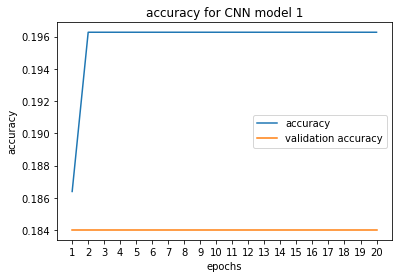

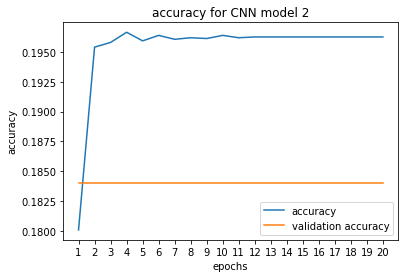

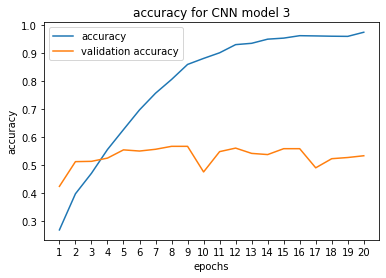

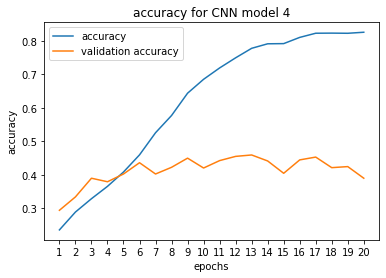

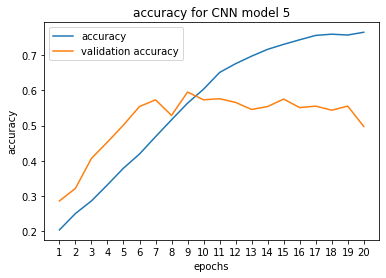

In [30]:
elist = list(range(1, 6))
for e in elist:
    stringname = "CNN_model_" + str(e) + "_fit"
    plot_epochs(eval(stringname), str(e))

From these plots it's easy to see how inadequate models 1 and 2 are:  validation accuracy remains absolutely flat.  (Specifically, what does this mean?)  Obviously these are not promising models at all.  Models 3 - 5 demonstrate at least some progress with validation - but also, some overfitting, even within 20 epochs.

I can also note: model 2, which adds only another Dense layer as compared to model 1, converges to exactly the same values for both accuracies.  The extra Dense layer doesn't seem to have done much of anything.  In models 3 - 5, though, adding additional Conv2D layers at the front seems to have improved accuracy substantially.  Of these models, model 4 seems the worst.  In model 5, the dropout rate is increased, which seems to boost validation accuracy a bit.

It might be worthwhile to make some more simple models from scratch, just to get a handle on how these hyperparameters (if that's appropriate to call them) play out.  But in terms of building a more useful model, it might be better to apply transfer learning to an existing visual classifier.

# InceptionV3 Models

In [56]:
# forgot to include this, move it to the imports on revision
from keras.applications import InceptionV3
input_s = (131, 131, 1)
IV3 = InceptionV3(include_top = False, weights = "imagenet", input_shape = input_s)



ValueError: The input must have 3 channels; Received `input_shape=(131, 131, 1)`

OUCH.  A brief investigation reveals that InceptionV3 is designed for RGB images!  It's possible to modify the model (it is of course on GitHub) to take monochrome input, and doing this might be worthwhile - but, importantly, the "imagenet" weights (and indeed any other pretrained weights) are trained on 3-channel inputs.  The training weights would be, then, pretty much worthless, and training such a model _from scratch_ would take a great deal of processor time, on a system that gets _far_ more mileage out of that time than this machine ever will.  

The only other solution seems to be to go back to preprocessing and revert all images to RGB, which will, of course, radically increase run times, and chip away at accuracy for my naive models.  I really want to try InceptionV3, and will come back to this.

In [63]:
# went back and saved RGB images

fh = open('RealWaste_X_train_aug_RGB.pkl', 'rb')
X_train_aug_RGB=pickle.load(fh)
fh.close()

fh = open('RealWaste_X_test_RGB.pkl', 'rb')
X_test_aug_RGB=pickle.load(fh)
fh.close()

fh = open('RealWaste_y_train_aug_RGB.pkl', 'rb')
y_train_aug_RGB=pickle.load(fh)
fh.close()

fh = open('RealWaste_y_test_RGB.pkl', 'rb')
y_test_aug_RGB=pickle.load(fh)
fh.close()

In [64]:
X_train_aug_RGB = np.asarray(X_train_aug_RGB)
X_test_aug_RGB = np.asarray(X_test_aug_RGB)
y_train_aug_RGB = np.asarray(y_train_aug_RGB)
y_test_aug_RGB = np.asarray(y_test_aug_RGB)

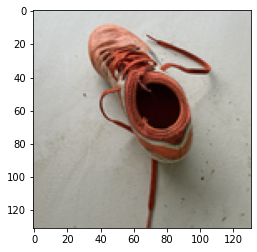

In [68]:
plt.imshow(X_train_aug_RGB[1114])

In [60]:
# let's try this again

input_s = (131, 131, 3)
IV3 = InceptionV3(include_top = False, weights = "imagenet", input_shape = input_s)



In [61]:
# a very simple IV3 model to start 

IV3_model_1 = Sequential([IV3])
for layer in IV3_model_1.layers:
    layer.trainable = False

# flatten, add final dense layer, add softmax layer
    
IV3_model_1.add(Flatten())    
IV3_model_1.add(Dense(2048, activation='relu'))
IV3_model_1.add(Dropout(0.2))
IV3_model_1.add(Dense(9, activation='softmax'))

IV3_model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_22 (Dense)            (None, 2048)              16779264  
                                                                 
 dropout_10 (Dropout)        (None, 2048)              0         
                                                                 
 dense_23 (Dense)            (None, 9)                 18441     
                                                                 
Total params: 38,600,489
Trainable params: 16,797,705
Non-trainable params: 21,802,784
_________________________________________________________________


In [69]:
IV3_model_1.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

IV3_model_1_fit = IV3_model_1.fit(X_train_aug_RGB, y_train_aug_RGB, 
                                  validation_data=(X_test_aug_RGB, y_test_aug_RGB), 
                                  batch_size=32, epochs=20)

Epoch 1/20
476/476 [==============================] - 386s 797ms/step - loss: 24.0725 - accuracy: 0.4107 - val_loss: 2.2081 - val_accuracy: 0.2124
Epoch 2/20
476/476 [==============================] - 385s 809ms/step - loss: 1.2832 - accuracy: 0.5460 - val_loss: 2.1460 - val_accuracy: 0.2271
Epoch 3/20
476/476 [==============================] - 866s 2s/step - loss: 1.1562 - accuracy: 0.5848 - val_loss: 2.1575 - val_accuracy: 0.2114
Epoch 4/20
476/476 [==============================] - 305s 642ms/step - loss: 1.0676 - accuracy: 0.6102 - val_loss: 2.1528 - val_accuracy: 0.2061
Epoch 5/20
476/476 [==============================] - 291s 611ms/step - loss: 1.0023 - accuracy: 0.6339 - val_loss: 2.1470 - val_accuracy: 0.2061
Epoch 6/20
476/476 [==============================] - 273s 573ms/step - loss: 0.9795 - accuracy: 0.6415 - val_loss: 2.1443 - val_accuracy: 0.2061
Epoch 7/20
476/476 [==============================] - 272s 572ms/step - loss: 0.9202 - accuracy: 0.6612 - val_loss: 2.1418 - v

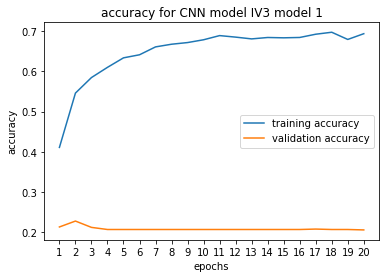

In [70]:
plot_epochs(IV3_model_1_fit, "IV3 model 1")

Not only is validation accuracy dismal - it doesn't even demonstrate any improvement!  Let's try more IV3 models.  Some more trailing layers might help.  Alternatively - it might be interesting to see what happens if we make the IV3 layers trainable.  I'm going to start with the former.

In [72]:
# if at some point I'm going to make IV3 layers trainable, it's probably prudent to get in the habit of instantiating
# them afresh for each model


input_s = (131, 131, 3)
IV3 = InceptionV3(include_top = False, weights = "imagenet", input_shape = input_s)

IV3_model_2 = Sequential([IV3])

# keeping them untrainable, for now
for layer in IV3_model_2.layers:
    layer.trainable = False

# flatten, add final dense layer, add softmax layer
    
IV3_model_2.add(Flatten())    
IV3_model_2.add(Dense(1024, activation='relu'))
IV3_model_2.add(Dense(1024, activation='relu'))
IV3_model_2.add(Dense(1024, activation='relu'))
IV3_model_2.add(Dropout(0.2))
IV3_model_2.add(Dense(9, activation='softmax'))

IV3_model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_10 (Flatten)        (None, 8192)              0         
                                                                 
 dense_28 (Dense)            (None, 1024)              8389632   
                                                                 
 dense_29 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_30 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_12 (Dropout)        (None, 1024)              0         
                                                                 
 dense_31 (Dense)            (None, 9)               

In [74]:
IV3_model_2.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

IV3_model_2_fit = IV3_model_2.fit(X_train_aug_RGB, y_train_aug_RGB, 
                                  validation_data=(X_test_aug_RGB, y_test_aug_RGB), 
                                  batch_size=32, epochs=20)

Epoch 1/20
476/476 [==============================] - 363s 753ms/step - loss: 6.4153 - accuracy: 0.4263 - val_loss: 2.1428 - val_accuracy: 0.2072
Epoch 2/20
476/476 [==============================] - 306s 643ms/step - loss: 1.1770 - accuracy: 0.5747 - val_loss: 2.1435 - val_accuracy: 0.2072
Epoch 3/20
476/476 [==============================] - 265s 557ms/step - loss: 1.0660 - accuracy: 0.6144 - val_loss: 2.1389 - val_accuracy: 0.2072
Epoch 4/20
476/476 [==============================] - 265s 556ms/step - loss: 0.9720 - accuracy: 0.6427 - val_loss: 2.1487 - val_accuracy: 0.1556
Epoch 5/20
476/476 [==============================] - 266s 559ms/step - loss: 0.8982 - accuracy: 0.6672 - val_loss: 2.1412 - val_accuracy: 0.2072
Epoch 6/20
476/476 [==============================] - 254s 534ms/step - loss: 0.8493 - accuracy: 0.6870 - val_loss: 2.1393 - val_accuracy: 0.2072
Epoch 7/20
476/476 [==============================] - 237s 499ms/step - loss: 0.7827 - accuracy: 0.7121 - val_loss: 2.1463 -

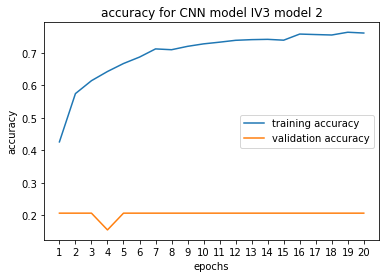

In [80]:
plot_epochs(IV3_model_2_fit, "IV3 model 2")

Interestingly, the validation accuracy is _again_ not developing at all, remaining at a constant and dismal 0.2072.  What's up with this?

In [75]:
# the exact same model as IV3_model_2, but trainable
input_s = (131, 131, 3)
IV3 = InceptionV3(include_top = False, weights = "imagenet", input_shape = input_s)

IV3_model_3 = Sequential([IV3])

# only difference:  IV3 layers are trainable
for layer in IV3_model_2.layers:
    layer.trainable = True

# flatten, add final dense layer, add softmax layer
    
IV3_model_3.add(Flatten())    
IV3_model_3.add(Dense(1024, activation='relu'))
IV3_model_3.add(Dense(1024, activation='relu'))
IV3_model_3.add(Dense(1024, activation='relu'))
IV3_model_3.add(Dropout(0.2))
IV3_model_3.add(Dense(9, activation='softmax'))

IV3_model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_11 (Flatten)        (None, 8192)              0         
                                                                 
 dense_32 (Dense)            (None, 1024)              8389632   
                                                                 
 dense_33 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_34 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_13 (Dropout)        (None, 1024)              0         
                                                                 
 dense_35 (Dense)            (None, 9)               

In [76]:
IV3_model_3.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

IV3_model_3_fit = IV3_model_3.fit(X_train_aug_RGB, y_train_aug_RGB, 
                                  validation_data=(X_test_aug_RGB, y_test_aug_RGB), 
                                  batch_size=32, epochs=20)

Epoch 1/20
476/476 [==============================] - 845s 2s/step - loss: 2.1922 - accuracy: 0.1837 - val_loss: 2.5021 - val_accuracy: 0.2050
Epoch 2/20
476/476 [==============================] - 821s 2s/step - loss: 2.1479 - accuracy: 0.1897 - val_loss: 2.1359 - val_accuracy: 0.2072
Epoch 3/20
476/476 [==============================] - 817s 2s/step - loss: 2.1459 - accuracy: 0.1896 - val_loss: 2.7148 - val_accuracy: 0.1987
Epoch 4/20
476/476 [==============================] - 832s 2s/step - loss: 2.1462 - accuracy: 0.1891 - val_loss: 2.1362 - val_accuracy: 0.2072
Epoch 5/20
270/476 [================>.............] - ETA: 8:28 - loss: 2.1436 - accuracy: 0.1933

KeyboardInterrupt: 

Well, the most apparent effect of making the IV3 layers trainable was to _dramatically_ increase the runtime.  Observing the first few epochs, it's clear that this fit is proceeding not only at a snail's pace, but quite poorly.  As in the previous IV3 models, validation accuracy is (basically) flat and low.  

However, having made the IV3 models trainable, I'm seeing that the _training_ accuracy is also very low, and improving barely if at all.  I'm going to interrupt the kernel on this one; it's useless.  I think I need a model with a few more layers... and making IV3 trainable is a failed idea, I think.

In [77]:
input_s = (131, 131, 3)
IV3 = InceptionV3(include_top = False, weights = "imagenet", input_shape = input_s)

IV3_model_4 = Sequential([IV3])

# keeping them untrainable, for now
for layer in IV3_model_4.layers:
    layer.trainable = False

# flatten, add final dense layers, add dropout layers, softmax layer
    
IV3_model_4.add(Flatten())    
IV3_model_4.add(Dense(2048, activation='relu'))
IV3_model_4.add(Dense(2048, activation='relu'))
IV3_model_4.add(Dropout(0.1))
IV3_model_4.add(Dense(2048, activation='relu'))
IV3_model_4.add(Dense(1024, activation='relu'))
IV3_model_4.add(Dense(1024, activation='relu'))
IV3_model_4.add(Dropout(0.2))
IV3_model_4.add(Dense(9, activation='softmax'))

IV3_model_4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_12 (Flatten)        (None, 8192)              0         
                                                                 
 dense_36 (Dense)            (None, 2048)              16779264  
                                                                 
 dense_37 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_14 (Dropout)        (None, 2048)              0         
                                                                 
 dense_38 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_39 (Dense)            (None, 1024)            

In [79]:
# ALSO INCREASING BATCH SIZE FOR THIS ONE

IV3_model_4.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

IV3_model_4_fit = IV3_model_4.fit(X_train_aug_RGB, y_train_aug_RGB, 
                                  validation_data=(X_test_aug_RGB, y_test_aug_RGB), 
                                  batch_size=64, epochs=20)

Epoch 1/20
238/238 [==============================] - 263s 1s/step - loss: 5.1189 - accuracy: 0.3366 - val_loss: 1.9753 - val_accuracy: 0.3165
Epoch 2/20
238/238 [==============================] - 198s 830ms/step - loss: 1.2338 - accuracy: 0.5584 - val_loss: 1.8627 - val_accuracy: 0.3396
Epoch 3/20
238/238 [==============================] - 183s 771ms/step - loss: 1.0510 - accuracy: 0.6305 - val_loss: 1.8646 - val_accuracy: 0.3260
Epoch 4/20
238/238 [==============================] - 187s 787ms/step - loss: 0.9406 - accuracy: 0.6721 - val_loss: 1.7782 - val_accuracy: 0.3375
Epoch 5/20
238/238 [==============================] - 187s 785ms/step - loss: 0.8579 - accuracy: 0.6948 - val_loss: 1.8279 - val_accuracy: 0.3512
Epoch 6/20
238/238 [==============================] - 186s 782ms/step - loss: 0.7848 - accuracy: 0.7202 - val_loss: 1.7690 - val_accuracy: 0.3764
Epoch 7/20
238/238 [==============================] - 187s 786ms/step - loss: 0.7190 - accuracy: 0.7465 - val_loss: 1.7638 - va

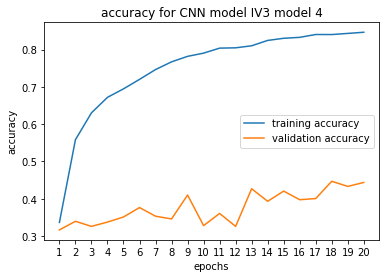

In [82]:
plot_epochs(IV3_model_4_fit, "IV3 model 4")

This is _actually slightly promising_:  validation accuracy is bouncing around, as one would expect... and it demonstrates a general upward trend.  I'm going to continue in this direction, with some more dense layers, and even larger batch sizes - this will take a while to run, but I'd like to see.  I'm also going to let this next one run for more epochs.

In [83]:
input_s = (131, 131, 3)
IV3 = InceptionV3(include_top = False, weights = "imagenet", input_shape = input_s)

IV3_model_5 = Sequential([IV3])

# keeping them untrainable, for now
for layer in IV3_model_5.layers:
    layer.trainable = False

# flatten, add final dense layers, add dropout layers, softmax layer
    
IV3_model_5.add(Flatten())    
IV3_model_5.add(Dense(2048, activation='relu'))
IV3_model_5.add(Dense(2048, activation='relu'))
IV3_model_5.add(Dropout(0.1))
IV3_model_5.add(Dense(2048, activation='relu'))
IV3_model_5.add(Dense(2048, activation='relu'))
IV3_model_5.add(Dropout(0.1))
IV3_model_5.add(Dense(2048, activation='relu'))
IV3_model_5.add(Dense(2048, activation='relu'))
IV3_model_5.add(Dense(1024, activation='relu'))
IV3_model_5.add(Dense(1024, activation='relu'))
IV3_model_5.add(Dropout(0.2))
IV3_model_5.add(Dense(9, activation='softmax'))

IV3_model_5.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_13 (Flatten)        (None, 8192)              0         
                                                                 
 dense_42 (Dense)            (None, 2048)              16779264  
                                                                 
 dense_43 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_16 (Dropout)        (None, 2048)              0         
                                                                 
 dense_44 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_45 (Dense)            (None, 2048)            

In [84]:
# bringing batch size up to 128... I have 9 categories after all
# also increasing epochs to 50, this will take quite a while

IV3_model_5.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

IV3_model_5_fit = IV3_model_5.fit(X_train_aug_RGB, y_train_aug_RGB, 
                                  validation_data=(X_test_aug_RGB, y_test_aug_RGB), 
                                  batch_size=128, epochs=50)

Epoch 1/50
119/119 [==============================] - 256s 2s/step - loss: 3.8752 - accuracy: 0.2019 - val_loss: 2.0215 - val_accuracy: 0.2850
Epoch 2/50
119/119 [==============================] - 281s 2s/step - loss: 1.6623 - accuracy: 0.3508 - val_loss: 1.9663 - val_accuracy: 0.2334
Epoch 3/50
119/119 [==============================] - 258s 2s/step - loss: 1.3717 - accuracy: 0.4903 - val_loss: 1.8950 - val_accuracy: 0.2597
Epoch 4/50
119/119 [==============================] - 249s 2s/step - loss: 1.1543 - accuracy: 0.5884 - val_loss: 1.9327 - val_accuracy: 0.2429
Epoch 5/50
119/119 [==============================] - 246s 2s/step - loss: 1.0473 - accuracy: 0.6332 - val_loss: 1.9150 - val_accuracy: 0.2976
Epoch 6/50
119/119 [==============================] - 243s 2s/step - loss: 0.9389 - accuracy: 0.6712 - val_loss: 1.8177 - val_accuracy: 0.3239
Epoch 7/50
119/119 [==============================] - 184s 2s/step - loss: 0.8772 - accuracy: 0.6862 - val_loss: 1.9132 - val_accuracy: 0.2944

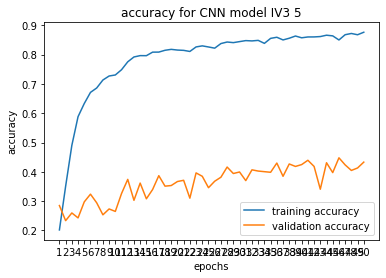

In [86]:
plot_epochs(IV3_model_5_fit, "IV3 5")

I suspect the batch size is a little large there, and is maybe slowing down an effective fit.  I'm going to compare results drawing it back down to 64, and still run for 50 epochs.

In [90]:
input_s = (131, 131, 3)
IV3 = InceptionV3(include_top = False, weights = "imagenet", input_shape = input_s)

IV3_model_6 = Sequential([IV3])

# keeping them untrainable, for now
for layer in IV3_model_6.layers:   # <====== MISSED THIS!!
    layer.trainable = False

# flatten, add final dense layers, add dropout layers, softmax layer
IV3_model_6.add(Flatten())    
IV3_model_6.add(Dense(2048, activation='relu'))
IV3_model_6.add(Dense(2048, activation='relu'))
IV3_model_6.add(Dropout(0.1))
IV3_model_6.add(Dense(2048, activation='relu'))
IV3_model_6.add(Dense(2048, activation='relu'))
IV3_model_6.add(Dropout(0.1))
IV3_model_6.add(Dense(2048, activation='relu'))
IV3_model_6.add(Dense(2048, activation='relu'))
IV3_model_6.add(Dense(1024, activation='relu'))
IV3_model_6.add(Dense(1024, activation='relu'))
IV3_model_6.add(Dropout(0.2))
IV3_model_6.add(Dense(9, activation='softmax'))

IV3_model_6.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_15 (Flatten)        (None, 8192)              0         
                                                                 
 dense_60 (Dense)            (None, 2048)              16779264  
                                                                 
 dense_61 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_22 (Dropout)        (None, 2048)              0         
                                                                 
 dense_62 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_63 (Dense)            (None, 2048)            

In [91]:
IV3_model_6.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

IV3_model_6_fit = IV3_model_6.fit(X_train_aug_RGB, y_train_aug_RGB, 
                                  validation_data=(X_test_aug_RGB, y_test_aug_RGB), 
                                  batch_size=64, epochs=50)

Epoch 1/50
238/238 [==============================] - 219s 901ms/step - loss: 2.9693 - accuracy: 0.2241 - val_loss: 2.0553 - val_accuracy: 0.2093
Epoch 2/50
238/238 [==============================] - 214s 899ms/step - loss: 1.6204 - accuracy: 0.3651 - val_loss: 2.0511 - val_accuracy: 0.2082
Epoch 3/50
238/238 [==============================] - 212s 892ms/step - loss: 1.3994 - accuracy: 0.4773 - val_loss: 2.0481 - val_accuracy: 0.2292
Epoch 4/50
238/238 [==============================] - 214s 901ms/step - loss: 1.2471 - accuracy: 0.5514 - val_loss: 1.9840 - val_accuracy: 0.2934
Epoch 5/50
238/238 [==============================] - 214s 898ms/step - loss: 1.1232 - accuracy: 0.6050 - val_loss: 2.1520 - val_accuracy: 0.2114
Epoch 6/50
238/238 [==============================] - 214s 898ms/step - loss: 1.0644 - accuracy: 0.6285 - val_loss: 2.1122 - val_accuracy: 0.1977
Epoch 7/50
238/238 [==============================] - 214s 899ms/step - loss: 0.9759 - accuracy: 0.6663 - val_loss: 1.9109 -

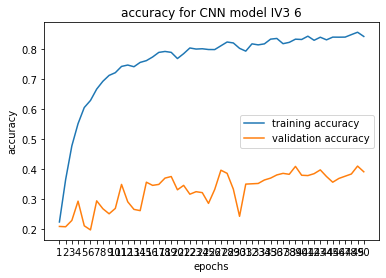

In [94]:
plot_epochs(IV3_model_6_fit, "IV3 6")

In [92]:
input_s = (131, 131, 3)
IV3 = InceptionV3(include_top = False, weights = "imagenet", input_shape = input_s)

IV3_model_7 = Sequential([IV3])

# keeping them untrainable, for now
for layer in IV3_model_7.layers:
    layer.trainable = False

# flatten, add final dense layers, add dropout layers, softmax layer
IV3_model_7.add(Flatten())    
IV3_model_7.add(Dense(2048, activation='relu'))
IV3_model_7.add(Dense(2048, activation='relu'))
IV3_model_7.add(Dropout(0.2))
IV3_model_7.add(Dense(2048, activation='relu'))
IV3_model_7.add(Dense(2048, activation='relu'))
IV3_model_7.add(Dropout(0.2))
IV3_model_7.add(Dense(2048, activation='relu'))
IV3_model_7.add(Dense(2048, activation='relu'))
IV3_model_7.add(Dense(1024, activation='relu'))
IV3_model_7.add(Dense(1024, activation='relu'))
IV3_model_7.add(Dropout(0.3))
IV3_model_7.add(Dense(9, activation='softmax'))

IV3_model_7.summary()

In [93]:
IV3_model_7.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

IV3_model_7_fit = IV3_model_7.fit(X_train_aug_RGB, y_train_aug_RGB, 
                                  validation_data=(X_test_aug_RGB, y_test_aug_RGB), 
                                  batch_size=256, epochs=100)

Epoch 1/100
60/60 [==============================] - 161s 3s/step - loss: 5.8443 - accuracy: 0.1712 - val_loss: 2.0581 - val_accuracy: 0.2450
Epoch 2/100
60/60 [==============================] - 156s 3s/step - loss: 1.8641 - accuracy: 0.2621 - val_loss: 2.0846 - val_accuracy: 0.2482
Epoch 3/100
60/60 [==============================] - 156s 3s/step - loss: 1.6026 - accuracy: 0.3710 - val_loss: 1.9982 - val_accuracy: 0.2608
Epoch 4/100
60/60 [==============================] - 155s 3s/step - loss: 1.3858 - accuracy: 0.4755 - val_loss: 1.9819 - val_accuracy: 0.2850
Epoch 5/100
60/60 [==============================] - 156s 3s/step - loss: 1.2106 - accuracy: 0.5518 - val_loss: 1.9134 - val_accuracy: 0.3049
Epoch 6/100
60/60 [==============================] - 156s 3s/step - loss: 1.0585 - accuracy: 0.6177 - val_loss: 1.8083 - val_accuracy: 0.3554
Epoch 7/100
60/60 [==============================] - 155s 3s/step - loss: 0.9389 - accuracy: 0.6673 - val_loss: 1.8195 - val_accuracy: 0.3070
Epoch 

60/60 [==============================] - 155s 3s/step - loss: 0.2820 - accuracy: 0.9038 - val_loss: 1.9613 - val_accuracy: 0.4048
Epoch 59/100
60/60 [==============================] - 155s 3s/step - loss: 0.2638 - accuracy: 0.9090 - val_loss: 1.9074 - val_accuracy: 0.4585
Epoch 60/100
60/60 [==============================] - 155s 3s/step - loss: 0.2696 - accuracy: 0.9083 - val_loss: 1.9184 - val_accuracy: 0.4511
Epoch 61/100
60/60 [==============================] - 154s 3s/step - loss: 0.2688 - accuracy: 0.9098 - val_loss: 1.9413 - val_accuracy: 0.4343
Epoch 62/100
60/60 [==============================] - 154s 3s/step - loss: 0.2778 - accuracy: 0.9091 - val_loss: 1.9831 - val_accuracy: 0.4805
Epoch 63/100
60/60 [==============================] - 155s 3s/step - loss: 0.2778 - accuracy: 0.9081 - val_loss: 1.9180 - val_accuracy: 0.3807
Epoch 64/100
60/60 [==============================] - 155s 3s/step - loss: 0.3204 - accuracy: 0.8900 - val_loss: 1.7180 - val_accuracy: 0.4311
Epoch 65/100

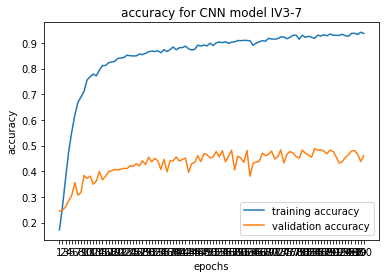

In [95]:
plot_epochs(IV3_model_7_fit, "IV3-7")

Well, the x-axis ticks have become a blur, but... one gets the picture.  Both training and validation accuracy continue to have some noise; the absence of this in the early models is troubling.  Letting the model run for 100 epochs did show some more development.  But it looks - generally - as though validation accuracy is approaching an asymptote around 0.5 (again, with noise) - I was hoping to do better than that.  (Of course, again - this isn't binary classification.  There are nine categories here; the "blind guess" accuracy would be 0.1111.)

All of these models have been run on what is at this point a pretty dated laptop.  I'm in the process of migrating to a desktop system with multiple GPU's - once I'm done with this migration, I'll return and run some larger IV3 models for more epochs.  But for now, I'd like to see how ResNet-50 performs.

# ResNet-50 Models

I've never trained a ResNet-50 Model before; I'm loosely following some online examples.  My first priority is just to construct the model correctly and see how it fits.

In [45]:
input_t = Input(shape=(131, 131, 1))
RN50 = ResNet50(include_top=False, weights="imagenet", input_tensor=input_t)

ValueError: Cannot assign value to variable ' conv1_conv/kernel:0': Shape mismatch.The variable shape (7, 7, 1, 64), and the assigned value shape (64, 3, 7, 7) are incompatible.

This, too, is a bit dispiriting - this ValueError is tied specifically to the input tensor having dimension (,,1) instead of (,,3) - the following throws no exceptions:

In [103]:
input_t = Input(shape=(131, 131, 3))
RN50 = ResNet50(include_top=False, weights="imagenet", input_tensor=input_t)
RN_model_1 = Sequential([RN50])

for layer in RN_model_1.layers[:-1]:     # one example suggested leaving the last layer trainable, maybe try on IV3
    layer.trainable = False
    
RN_model_1.add(Flatten())    
RN_model_1.add(Dense(2048, activation='relu'))
RN_model_1.add(Dense(2048, activation='relu'))
RN_model_1.add(Dropout(0.2))
RN_model_1.add(Dense(9, activation='softmax'))

RN_model_1.summary()    

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_17 (Flatten)        (None, 51200)             0         
                                                                 
 dense_78 (Dense)            (None, 2048)              104859648 
                                                                 
 dense_79 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_28 (Dropout)        (None, 2048)              0         
                                                                 
 dense_80 (Dense)            (None, 9)                 18441     
                                                                 
Total params: 132,662,153
Trainable params: 132,609,0

Hmmmm.... why are there _that_ many trainable layers for dense_78?  That seems odd; regardless, let's proceed.  I suppose this will take a lot of fitting time.

In [105]:
RN_model_1.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

RN_model_1_fit = RN_model_1.fit(X_train_aug_RGB, y_train_aug_RGB, 
                                  validation_data=(X_test_aug_RGB, y_test_aug_RGB), 
                                  batch_size=128, epochs=40)

Epoch 1/40
 45/119 [==========>...................] - ETA: 24:28 - loss: 4.6997 - accuracy: 0.1913

KeyboardInterrupt: 

That was going to take... _way_ too long.  Let's try making trainable = False for all RN50 layers?


In [108]:
input_t = Input(shape=(131, 131, 3))
RN50 = ResNet50(include_top=False, weights="imagenet", input_tensor=input_t)
RN_model_1 = Sequential([RN50])

for layer in RN_model_1.layers:    
    layer.trainable = False
    
RN_model_1.add(Flatten())    
RN_model_1.add(Dense(128, activation='relu'))
RN_model_1.add(Dense(2048, activation='relu'))
RN_model_1.add(Dropout(0.2))
RN_model_1.add(Dense(9, activation='softmax'))

RN_model_1.summary()    

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_20 (Flatten)        (None, 51200)             0         
                                                                 
 dense_87 (Dense)            (None, 128)               6553728   
                                                                 
 dense_88 (Dense)            (None, 2048)              264192    
                                                                 
 dropout_31 (Dropout)        (None, 2048)              0         
                                                                 
 dense_89 (Dense)            (None, 9)                 18441     
                                                                 
Total params: 30,424,073
Trainable params: 6,836,361


With RN50, apparently, the output shape is substantially larger - feeding this (after Flatten()) to the first dense layer of shape (none, n) is producing 51200*n trainable parameters... So I've scaled back the first Dense() layer substantially.

In [109]:
RN_model_1.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

RN_model_1_fit = RN_model_1.fit(X_train_aug_RGB, y_train_aug_RGB, 
                                  validation_data=(X_test_aug_RGB, y_test_aug_RGB), 
                                  batch_size=128, epochs=40)

Epoch 1/40
119/119 [==============================] - 420s 3s/step - loss: 2.1235 - accuracy: 0.2497 - val_loss: 1.3032 - val_accuracy: 0.5237
Epoch 2/40
119/119 [==============================] - 372s 3s/step - loss: 1.8946 - accuracy: 0.2928 - val_loss: 1.1150 - val_accuracy: 0.6330
Epoch 3/40
119/119 [==============================] - 342s 3s/step - loss: 1.8267 - accuracy: 0.3229 - val_loss: 1.1692 - val_accuracy: 0.6572
Epoch 4/40
119/119 [==============================] - 373s 3s/step - loss: 1.7837 - accuracy: 0.3362 - val_loss: 1.1199 - val_accuracy: 0.6877
Epoch 5/40
119/119 [==============================] - 344s 3s/step - loss: 1.7379 - accuracy: 0.3484 - val_loss: 0.9520 - val_accuracy: 0.7308
Epoch 6/40
119/119 [==============================] - 339s 3s/step - loss: 1.7102 - accuracy: 0.3585 - val_loss: 1.0257 - val_accuracy: 0.7350
Epoch 7/40
119/119 [==============================] - 339s 3s/step - loss: 1.7076 - accuracy: 0.3615 - val_loss: 0.9998 - val_accuracy: 0.7424

In [110]:
# RN50 is proving more challenging than expected

input_t = Input(shape=(131, 131, 3))
RN50 = ResNet50(include_top=False, weights="imagenet", input_tensor=input_t)
RN_model_2 = Sequential([RN50])

for layer in RN_model_2.layers:    
    layer.trainable = False
    
RN_model_2.add(Flatten())    
RN_model_2.add(Dense(128, activation='relu'))
RN_model_2.add(Dense(512, activation='relu'))
RN_model_2.add(Dropout(0.2))
RN_model_2.add(Dense(512, activation='relu'))
RN_model_2.add(Dense(2048, activation='relu'))
RN_model_2.add(Dense(9, activation='softmax'))

RN_model_2.summary()    

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_21 (Flatten)        (None, 51200)             0         
                                                                 
 dense_90 (Dense)            (None, 128)               6553728   
                                                                 
 dense_91 (Dense)            (None, 512)               66048     
                                                                 
 dropout_32 (Dropout)        (None, 512)               0         
                                                                 
 dense_92 (Dense)            (None, 512)               262656    
                                                                 
 dense_93 (Dense)            (None, 2048)            

In [111]:
# dropping batch size to 64

RN_model_2.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

RN_model_2_fit = RN_model_2.fit(X_train_aug_RGB, y_train_aug_RGB, 
                                  validation_data=(X_test_aug_RGB, y_test_aug_RGB), 
                                  batch_size=64 , epochs=40)

Epoch 1/40
238/238 [==============================] - 345s 1s/step - loss: 2.0577 - accuracy: 0.2465 - val_loss: 1.1779 - val_accuracy: 0.5794
Epoch 2/40
238/238 [==============================] - 341s 1s/step - loss: 1.8605 - accuracy: 0.2999 - val_loss: 1.0303 - val_accuracy: 0.6667
Epoch 3/40
238/238 [==============================] - 341s 1s/step - loss: 1.7815 - accuracy: 0.3348 - val_loss: 0.9160 - val_accuracy: 0.7098
Epoch 4/40
238/238 [==============================] - 340s 1s/step - loss: 1.7319 - accuracy: 0.3521 - val_loss: 0.9517 - val_accuracy: 0.7508
Epoch 5/40
238/238 [==============================] - 340s 1s/step - loss: 1.7131 - accuracy: 0.3589 - val_loss: 1.0392 - val_accuracy: 0.7287
Epoch 6/40
238/238 [==============================] - 345s 1s/step - loss: 1.6922 - accuracy: 0.3690 - val_loss: 0.9020 - val_accuracy: 0.7581
Epoch 7/40
238/238 [==============================] - 342s 1s/step - loss: 1.6696 - accuracy: 0.3732 - val_loss: 1.2599 - val_accuracy: 0.7382

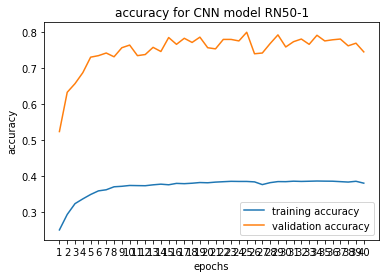

In [112]:
plot_epochs(RN_model_1_fit, "RN50-1")

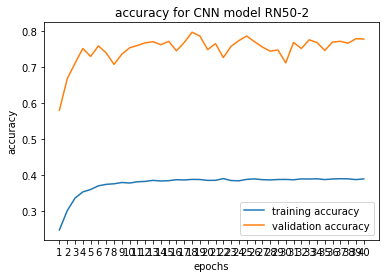

In [113]:
plot_epochs(RN_model_2_fit, "RN50-2")

This is odd:  in both of the ResNet-50 models so far, validation accuracy has been _much_ higher than training accuracy.  Suspiciously high, too.  I can't account for this, but I think it needs an explanation.